In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import numpy as np

In [2]:
energy = pd.read_csv('../data/eia_data.csv')

In [3]:
energy['Description'].value_counts()

Description
Wood Energy Production                695
Biofuels Production                   695
Total Biomass Energy Production       695
Total Renewable Energy Production     695
Hydroelectric Power Consumption       695
Geothermal Energy Consumption         695
Solar Energy Consumption              695
Wind Energy Consumption               695
Wood Energy Consumption               695
Waste Energy Consumption              695
Biofuels Consumption                  695
Total Biomass Energy Consumption      695
Total Renewable Energy Consumption    695
Name: count, dtype: int64

In [4]:
Hydro = energy.loc[energy['Description'] == 'Hydroelectric Power Consumption']

In [5]:
Solar = energy.loc[energy['Description'] == 'Solar Energy Consumption']

In [6]:
Wind = energy.loc[energy['Description'] == 'Wind Energy Consumption']

In [7]:
Hydro['YYYYMM'] = Hydro['YYYYMM'].astype('string')

C:\Users\Hunter\AppData\Local\Temp\ipykernel_18396\1803886293.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hydro['YYYYMM'] = Hydro['YYYYMM'].astype('string')


In [8]:
Hydro['YYYYMM'] = Hydro['YYYYMM'] +"01"

C:\Users\Hunter\AppData\Local\Temp\ipykernel_18396\1724863839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hydro['YYYYMM'] = Hydro['YYYYMM'] +"01"


In [9]:
Hydro.loc[Hydro.YYYYMM > '20121201']

,MSN,YYYYMM,Value,Column_Order,Description,Unit
3323,HVTCBUS,20121301,942.532,5,Hydroelectric Power Consumption,Trillion Btu
3324,HVTCBUS,20130101,84.715,5,Hydroelectric Power Consumption,Trillion Btu
3325,HVTCBUS,20130201,69.668,5,Hydroelectric Power Consumption,Trillion Btu
3326,HVTCBUS,20130301,70.063,5,Hydroelectric Power Consumption,Trillion Btu
3327,HVTCBUS,20130401,85.631,5,Hydroelectric Power Consumption,Trillion Btu
...,...,...,...,...,...,...
3470,HVTCBUS,20240401,66.116,5,Hydroelectric Power Consumption,Trillion Btu
3471,HVTCBUS,20240501,77.156,5,Hydroelectric Power Consumption,Trillion Btu
3472,HVTCBUS,20240601,72.234,5,Hydroelectric Power Consumption,Trillion Btu
3473,HVTCBUS,20240701,72.288,5,Hydroelectric Power Consumption,Trillion Btu


In [10]:
Solar['YYYYMM'] = Solar['YYYYMM'].astype('string')

C:\Users\Hunter\AppData\Local\Temp\ipykernel_18396\1860342258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solar['YYYYMM'] = Solar['YYYYMM'].astype('string')


In [11]:
Solar['YYYYMM'] = Solar['YYYYMM'] + "01"

C:\Users\Hunter\AppData\Local\Temp\ipykernel_18396\1533374409.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Solar['YYYYMM'] = Solar['YYYYMM'] + "01"


In [12]:
Solar.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
4170,SOTCBUS,19491301,Not Available,7,Solar Energy Consumption,Trillion Btu
4171,SOTCBUS,19501301,Not Available,7,Solar Energy Consumption,Trillion Btu
4172,SOTCBUS,19511301,Not Available,7,Solar Energy Consumption,Trillion Btu
4173,SOTCBUS,19521301,Not Available,7,Solar Energy Consumption,Trillion Btu
4174,SOTCBUS,19531301,Not Available,7,Solar Energy Consumption,Trillion Btu


In [13]:
Wind['YYYYMM'] = Wind['YYYYMM'].astype('string')

C:\Users\Hunter\AppData\Local\Temp\ipykernel_18396\542683654.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wind['YYYYMM'] = Wind['YYYYMM'].astype('string')


In [14]:
Wind['YYYYMM'] = Wind['YYYYMM'] + "01"

C:\Users\Hunter\AppData\Local\Temp\ipykernel_18396\4058774800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Wind['YYYYMM'] = Wind['YYYYMM'] + "01"


In [15]:
Wind.head()

,MSN,YYYYMM,Value,Column_Order,Description,Unit
4865,WYTCBUS,19491301,Not Available,8,Wind Energy Consumption,Trillion Btu
4866,WYTCBUS,19501301,Not Available,8,Wind Energy Consumption,Trillion Btu
4867,WYTCBUS,19511301,Not Available,8,Wind Energy Consumption,Trillion Btu
4868,WYTCBUS,19521301,Not Available,8,Wind Energy Consumption,Trillion Btu
4869,WYTCBUS,19531301,Not Available,8,Wind Energy Consumption,Trillion Btu


In [16]:
hydro_solar = pd.merge(Hydro, Solar,
         left_on = 'YYYYMM', right_on = 'YYYYMM', 
         how = 'outer')
hydro_solar.head()

,MSN_x,YYYYMM,Value_x,Column_Order_x,Description_x,Unit_x,MSN_y,Value_y,Column_Order_y,Description_y,Unit_y
0,HVTCBUS,19491301,323.365,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu
1,HVTCBUS,19501301,344.218,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu
2,HVTCBUS,19511301,356.131,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu
3,HVTCBUS,19521301,374.325,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu
4,HVTCBUS,19531301,374.015,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu


In [17]:
whs = pd.merge(hydro_solar, Wind,
         left_on = 'YYYYMM', right_on = 'YYYYMM',
         how = 'outer')
whs.head()

,MSN_x,YYYYMM,Value_x,Column_Order_x,Description_x,Unit_x,MSN_y,Value_y,Column_Order_y,Description_y,Unit_y,MSN,Value,Column_Order,Description,Unit
0,HVTCBUS,19491301,323.365,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,8,Wind Energy Consumption,Trillion Btu
1,HVTCBUS,19501301,344.218,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,8,Wind Energy Consumption,Trillion Btu
2,HVTCBUS,19511301,356.131,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,8,Wind Energy Consumption,Trillion Btu
3,HVTCBUS,19521301,374.325,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,8,Wind Energy Consumption,Trillion Btu
4,HVTCBUS,19531301,374.015,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,8,Wind Energy Consumption,Trillion Btu


In [18]:
whs = whs.rename(columns = {'Value_x':'Hydro_Energy_Consumed', 'Value_y':'Solar_Energy_Consumed', 'Value':'Wind_Energy_Consumed'})
whs.head(1)

,MSN_x,YYYYMM,Hydro_Energy_Consumed,Column_Order_x,Description_x,Unit_x,MSN_y,Solar_Energy_Consumed,Column_Order_y,Description_y,Unit_y,MSN,Wind_Energy_Consumed,Column_Order,Description,Unit
0,HVTCBUS,19491301,323.365,5,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,7,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,8,Wind Energy Consumption,Trillion Btu


In [19]:
whs = whs.drop(columns = ['Column_Order_x', 'Column_Order_y', 'Column_Order'])

In [20]:
whs = whs.rename(columns = {'YYYYMM':'Date', 'Description_x':'Hydro', 'Description_y':'Solar', 'Description':'Wind'})

In [21]:
whs.head()

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
0,HVTCBUS,19491301,323.365,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
1,HVTCBUS,19501301,344.218,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
2,HVTCBUS,19511301,356.131,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
3,HVTCBUS,19521301,374.325,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
4,HVTCBUS,19531301,374.015,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu


In [22]:
whs.loc[whs['Solar_Energy_Consumed'] == 'Not Available']

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
0,HVTCBUS,19491301,323.365,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
1,HVTCBUS,19501301,344.218,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
2,HVTCBUS,19511301,356.131,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
3,HVTCBUS,19521301,374.325,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
4,HVTCBUS,19531301,374.015,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,Not Available,Wind Energy Consumption,Trillion Btu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,HVTCBUS,19830901,74.808,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.001,Wind Energy Consumption,Trillion Btu
163,HVTCBUS,19831001,71.491,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.002,Wind Energy Consumption,Trillion Btu
164,HVTCBUS,19831101,84.956,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.001,Wind Energy Consumption,Trillion Btu
165,HVTCBUS,19831201,108.936,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0,Wind Energy Consumption,Trillion Btu


In [23]:
whs.loc[whs['Solar_Energy_Consumed'] == 'Not Available'].tail()

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
162,HVTCBUS,19830901,74.808,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.001,Wind Energy Consumption,Trillion Btu
163,HVTCBUS,19831001,71.491,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.002,Wind Energy Consumption,Trillion Btu
164,HVTCBUS,19831101,84.956,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.001,Wind Energy Consumption,Trillion Btu
165,HVTCBUS,19831201,108.936,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0,Wind Energy Consumption,Trillion Btu
166,HVTCBUS,19831301,1144.012,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,Not Available,Solar Energy Consumption,Trillion Btu,WYTCBUS,0.009,Wind Energy Consumption,Trillion Btu


In [24]:
whs = whs.loc[whs['Date'] > '19831301']

BTU stands for British Thermal Unit, it is a measure of the heat content of fuels or energy sources. 

In [26]:
whs = whs.loc[whs['Date'] < '20240101']

In [27]:
whs = whs.reset_index(drop = True)

In [28]:
whs_1 = whs

In [29]:
whs.tail()

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
515,HVTCBUS,20230901,57.716,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,81.556,Solar Energy Consumption,Trillion Btu,WYTCBUS,96.742,Wind Energy Consumption,Trillion Btu
516,HVTCBUS,20231001,53.475,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,74.296,Solar Energy Consumption,Trillion Btu,WYTCBUS,122.9,Wind Energy Consumption,Trillion Btu
517,HVTCBUS,20231101,58.092,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,56.874,Solar Energy Consumption,Trillion Btu,WYTCBUS,124.352,Wind Energy Consumption,Trillion Btu
518,HVTCBUS,20231201,64.922,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,50.393,Solar Energy Consumption,Trillion Btu,WYTCBUS,129.787,Wind Energy Consumption,Trillion Btu
519,HVTCBUS,20231301,835.948,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,880.325,Solar Energy Consumption,Trillion Btu,WYTCBUS,1436.934,Wind Energy Consumption,Trillion Btu


In [30]:
whs_12 = whs.loc[~whs['Date'].str.contains('1301')]

In [31]:
whs_12 = whs_12.loc[whs_12['Date'] > '20121201']

In [32]:
whs_12.head()

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
378,HVTCBUS,20130201,69.668,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,6.663,Solar Energy Consumption,Trillion Btu,WYTCBUS,48.026,Wind Energy Consumption,Trillion Btu
379,HVTCBUS,20130301,70.063,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,9.26,Solar Energy Consumption,Trillion Btu,WYTCBUS,53.758,Wind Energy Consumption,Trillion Btu
380,HVTCBUS,20130401,85.631,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,10.151,Solar Energy Consumption,Trillion Btu,WYTCBUS,59.629,Wind Energy Consumption,Trillion Btu
381,HVTCBUS,20130501,97.072,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,11.264,Solar Energy Consumption,Trillion Btu,WYTCBUS,55.406,Wind Energy Consumption,Trillion Btu
382,HVTCBUS,20130601,93.434,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,11.745,Solar Energy Consumption,Trillion Btu,WYTCBUS,46.909,Wind Energy Consumption,Trillion Btu


In [33]:
whs_12 = whs_12.reset_index(drop = True)

In [34]:
whs_12['Date'] = pd.to_datetime(whs_12['Date'], format = '%Y%m%d')

In [35]:
whs_12

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
0,HVTCBUS,2013-02-01,69.668,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,6.663,Solar Energy Consumption,Trillion Btu,WYTCBUS,48.026,Wind Energy Consumption,Trillion Btu
1,HVTCBUS,2013-03-01,70.063,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,9.26,Solar Energy Consumption,Trillion Btu,WYTCBUS,53.758,Wind Energy Consumption,Trillion Btu
2,HVTCBUS,2013-04-01,85.631,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,10.151,Solar Energy Consumption,Trillion Btu,WYTCBUS,59.629,Wind Energy Consumption,Trillion Btu
3,HVTCBUS,2013-05-01,97.072,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,11.264,Solar Energy Consumption,Trillion Btu,WYTCBUS,55.406,Wind Energy Consumption,Trillion Btu
4,HVTCBUS,2013-06-01,93.434,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,11.745,Solar Energy Consumption,Trillion Btu,WYTCBUS,46.909,Wind Energy Consumption,Trillion Btu
...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,HVTCBUS,2023-08-01,72.652,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,92.824,Solar Energy Consumption,Trillion Btu,WYTCBUS,96.881,Wind Energy Consumption,Trillion Btu
127,HVTCBUS,2023-09-01,57.716,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,81.556,Solar Energy Consumption,Trillion Btu,WYTCBUS,96.742,Wind Energy Consumption,Trillion Btu
128,HVTCBUS,2023-10-01,53.475,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,74.296,Solar Energy Consumption,Trillion Btu,WYTCBUS,122.9,Wind Energy Consumption,Trillion Btu
129,HVTCBUS,2023-11-01,58.092,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,56.874,Solar Energy Consumption,Trillion Btu,WYTCBUS,124.352,Wind Energy Consumption,Trillion Btu


In [36]:
whs_2 = whs_1

In [37]:
whs_2['Month'] = whs_2['Date'].str[4:]

When the month is 13 then that row is the total amount consumed for the whole year

In [39]:
whs_1['Year_totals'] = whs_1['Date']

In [40]:
whs_1['Year_totals'] = whs_1['Year_totals'].str[4:]

In [41]:
whs_1['Date'] = whs_1['Date'].str[:4]

In [42]:
whs_1 = whs_1.rename(columns = {'Date':'Year'})

In [43]:
whs_2['Date'] = whs_2['Date'].str[:4]

In [44]:
wsh_2 = whs_2.rename(columns = {'Date':'Year'})

In [45]:
yearly_totals = wsh_2.loc[wsh_2.Month == '1301']

In [46]:
yearly_totals = yearly_totals.reset_index(drop = True)

In [47]:
yt_13_23 = yearly_totals.loc[yearly_totals['Year'] > '2012']

In [48]:
yt_13_23 = yt_13_23.reset_index(drop = True)

In [49]:
yt_13_23.head(11)

,MSN_x,Year,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit,Month,Year_totals
0,HVTCBUS,2013,916.345,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,119.65,Solar Energy Consumption,Trillion Btu,WYTCBUS,572.669,Wind Energy Consumption,Trillion Btu,1301,1301
1,HVTCBUS,2014,884.959,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,161.05,Solar Energy Consumption,Trillion Btu,WYTCBUS,619.808,Wind Energy Consumption,Trillion Btu,1301,1301
2,HVTCBUS,2015,849.861,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,196.175,Solar Energy Consumption,Trillion Btu,WYTCBUS,650.732,Wind Energy Consumption,Trillion Btu,1301,1301
3,HVTCBUS,2016,913.775,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,250.888,Solar Energy Consumption,Trillion Btu,WYTCBUS,774.499,Wind Energy Consumption,Trillion Btu,1301,1301
4,HVTCBUS,2017,1024.736,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,328.623,Solar Energy Consumption,Trillion Btu,WYTCBUS,867.681,Wind Energy Consumption,Trillion Btu,1301,1301
5,HVTCBUS,2018,998.092,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,383.634,Solar Energy Consumption,Trillion Btu,WYTCBUS,930.341,Wind Energy Consumption,Trillion Btu,1301,1301
6,HVTCBUS,2019,982.225,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,429.747,Solar Energy Consumption,Trillion Btu,WYTCBUS,1009.551,Wind Energy Consumption,Trillion Btu,1301,1301
7,HVTCBUS,2020,973.355,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,511.315,Solar Energy Consumption,Trillion Btu,WYTCBUS,1153.045,Wind Energy Consumption,Trillion Btu,1301,1301
8,HVTCBUS,2021,858.407,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,626.863,Solar Energy Consumption,Trillion Btu,WYTCBUS,1290.407,Wind Energy Consumption,Trillion Btu,1301,1301
9,HVTCBUS,2022,869.339,Hydroelectric Power Consumption,Trillion Btu,SOTCBUS,764.563,Solar Energy Consumption,Trillion Btu,WYTCBUS,1481.823,Wind Energy Consumption,Trillion Btu,1301,1301


In [50]:
yt_13_23['Year'] = pd.to_numeric(yt_13_23['Year'])

In [51]:
yt_13_23['Hydro_Energy_Consumed'] = pd.to_numeric(yt_13_23['Hydro_Energy_Consumed'])

In [52]:
yt_13_23['Solar_Energy_Consumed'] = pd.to_numeric(yt_13_23['Solar_Energy_Consumed'])

In [53]:
yt_13_23['Wind_Energy_Consumed'] = pd.to_numeric(yt_13_23['Wind_Energy_Consumed'])

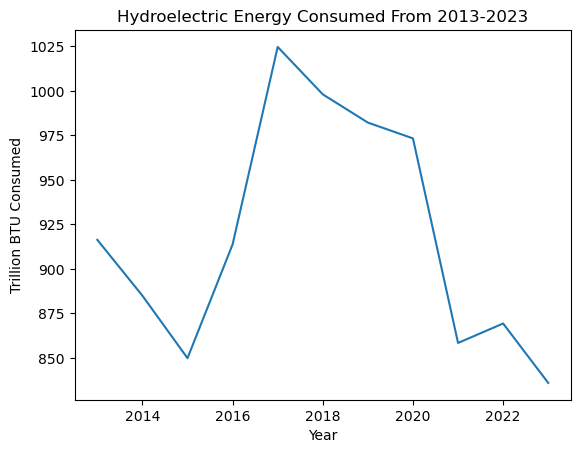

In [54]:
x = np.array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
y = np.array([916.345, 884.959, 849.861, 913.775, 1024.736, 998.092, 982.225, 973.335, 858.407, 869.339, 835.948])

plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Trillion BTU Consumed")
plt.title("Hydroelectric Energy Consumed From 2013-2023")
plt.show()

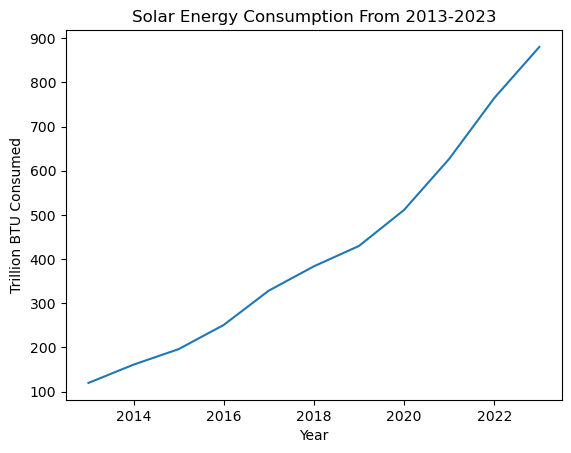

In [55]:
x = np.array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
y = np.array([119.65, 161.05, 196.175, 250.888, 328.623, 383.634, 429.747, 511.315, 626.863, 764.563, 880.325])

plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Trillion BTU Consumed")
plt.title("Solar Energy Consumption From 2013-2023")
plt.show()

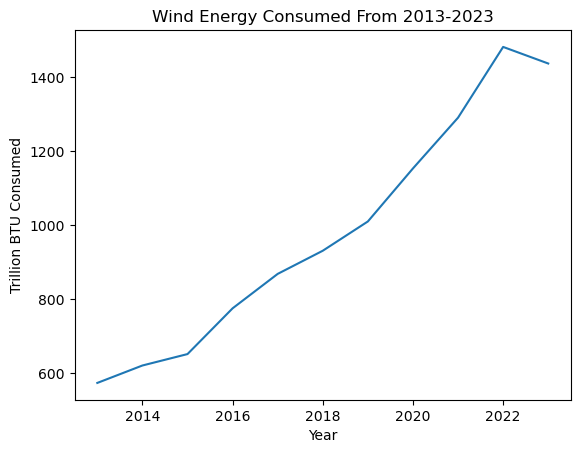

In [56]:
x = np.array([2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
y = np.array([572.669, 619.808, 650.732, 774.499, 867.681, 930.341, 1009.551, 1153.045, 1290.407, 1481.823, 1436.934])

plt.plot(x,y)
plt.xlabel("Year")
plt.ylabel("Trillion BTU Consumed")
plt.title("Wind Energy Consumed From 2013-2023")
plt.show()

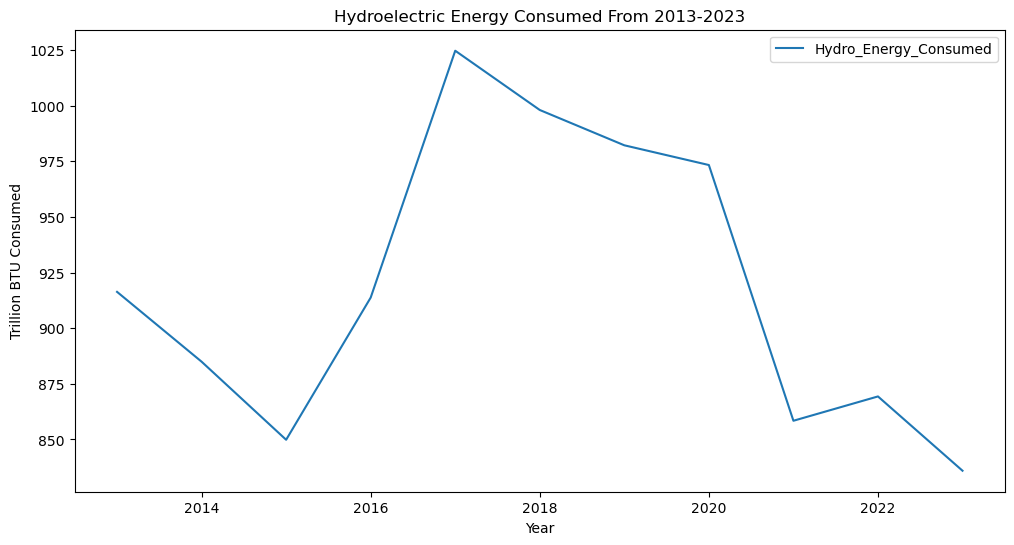

In [57]:
yt_13_23.plot(kind = 'line',
              x = 'Year',
              y = 'Hydro_Energy_Consumed',
              figsize = (12,6))
plt.title("Hydroelectric Energy Consumed From 2013-2023")
plt.ylabel("Trillion BTU Consumed");

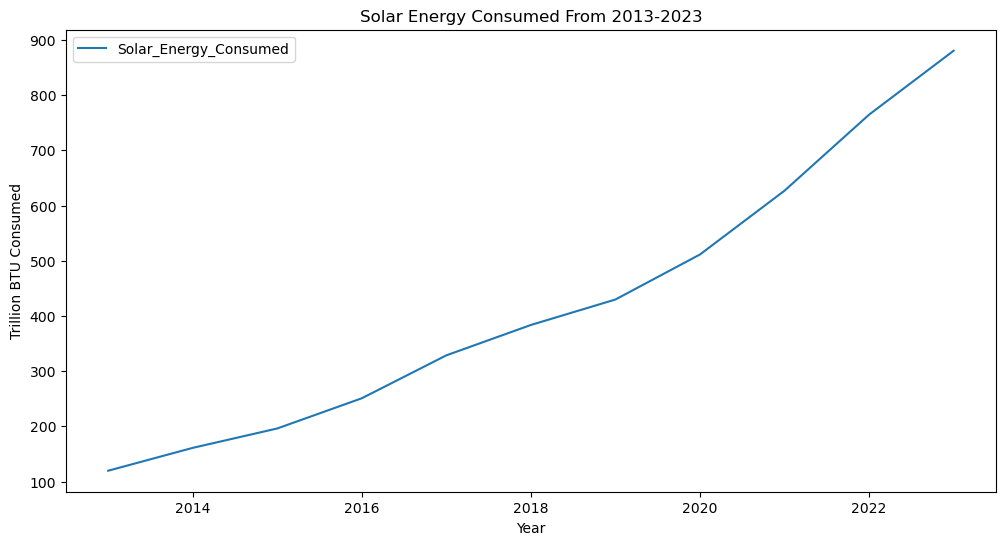

In [58]:
yt_13_23.plot(kind = 'line',
              x = 'Year',
              y = 'Solar_Energy_Consumed',
              figsize = (12,6))
plt.title("Solar Energy Consumed From 2013-2023")
plt.ylabel("Trillion BTU Consumed");

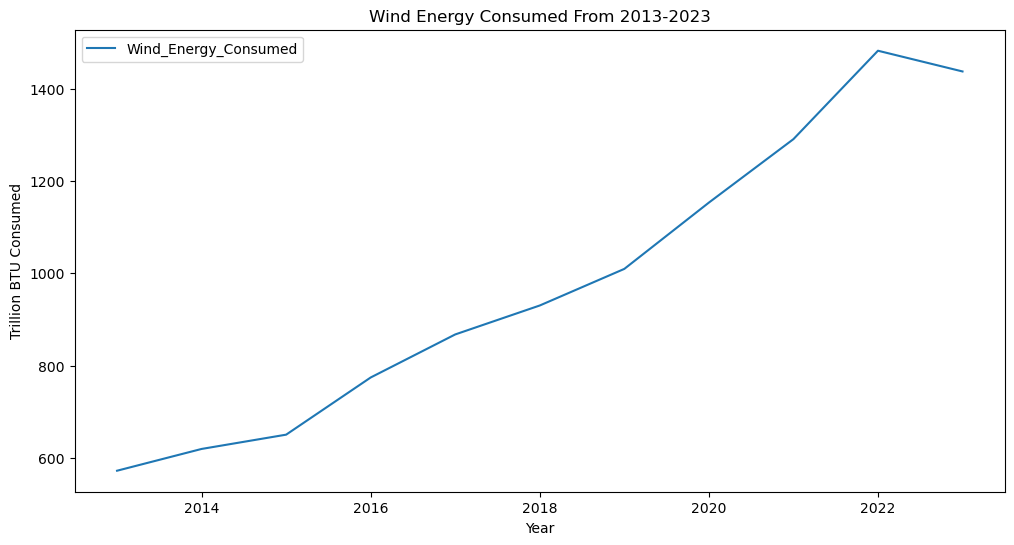

In [59]:
yt_13_23.plot(kind = 'line',
              x = 'Year',
              y = 'Wind_Energy_Consumed',
              figsize = (12,6))
plt.title("Wind Energy Consumed From 2013-2023")
plt.ylabel("Trillion BTU Consumed");

In [60]:
whs_12['Hydro_Energy_Consumed'] = pd.to_numeric(whs_12['Hydro_Energy_Consumed'])

In [61]:
Hydro_top = whs_12.sort_values(by = 'Hydro_Energy_Consumed', ascending = False).head(1)

In [62]:
Hydro_top = Hydro_top.drop(columns = ['MSN_y', 'Solar_Energy_Consumed', 'Solar', 'Unit_y', 'MSN', 'Wind_Energy_Consumed', 'Wind', 'Unit'])

In [63]:
Hydro_top

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x
51,HVTCBUS,2017-05-01,111.255,Hydroelectric Power Consumption,Trillion Btu


In [64]:
whs_12['Solar_Energy_Consumed'] = pd.to_numeric(whs_12['Solar_Energy_Consumed'])

In [65]:
Solar_top = whs_12.sort_values(by = 'Solar_Energy_Consumed', ascending = False).head(1)

In [66]:
Solar_top = Solar_top.drop(columns = ['MSN_x', 'Hydro_Energy_Consumed', 'Hydro', 'Unit_x', 'MSN', 'Wind_Energy_Consumed', 'Wind', 'Unit'])

In [67]:
Solar_top

,Date,MSN_y,Solar_Energy_Consumed,Solar,Unit_y
125,2023-07-01,SOTCBUS,97.656,Solar Energy Consumption,Trillion Btu


In [68]:
whs_12['Wind_Energy_Consumed'] = pd.to_numeric(whs_12['Wind_Energy_Consumed'])

In [69]:
Wind_top = whs_12.sort_values(by = 'Wind_Energy_Consumed', ascending = False).head(1)

In [70]:
Wind_top = Wind_top.drop(columns = ['MSN_x','Hydro_Energy_Consumed', 'Hydro', 'Unit_x', 'MSN_y', 'Solar_Energy_Consumed', 'Solar', 'Unit_y'])

In [71]:
Wind_top

,Date,MSN,Wind_Energy_Consumed,Wind,Unit
110,2022-04-01,WYTCBUS,157.522,Wind Energy Consumption,Trillion Btu


In [72]:
top_con = pd.concat([Hydro_top, Solar_top, Wind_top])
top_con

,MSN_x,Date,Hydro_Energy_Consumed,Hydro,Unit_x,MSN_y,Solar_Energy_Consumed,Solar,Unit_y,MSN,Wind_Energy_Consumed,Wind,Unit
51,HVTCBUS,2017-05-01,111.255,Hydroelectric Power Consumption,Trillion Btu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
125,NaN,2023-07-01,NaN,NaN,NaN,SOTCBUS,97.656,Solar Energy Consumption,Trillion Btu,NaN,NaN,NaN,NaN
110,NaN,2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,WYTCBUS,157.522,Wind Energy Consumption,Trillion Btu
